In [15]:
# pip install pandas


In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("3D printer Material Prediction.csv")
df

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.06,9.0,10,honeycomb,200,75,80,abs,75,200,9,0.9
62,0.04,2.0,80,grid,230,70,40,abs,50,40,12,0.8
63,0.02,4.5,70,honeycomb,240,85,40,abs,75,68,10,0.8
64,0.05,6.0,10,honeycomb,245,75,85,abs,75,205,5,0.5


In [9]:
df['infill_pattern'].value_counts()

infill_pattern
honeycomb    34
grid         32
Name: count, dtype: int64

In [18]:
df.describe() #deseriding the numerical columns                                                                                                             eaS

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.098182,5.583333,54.727273,222.272727,70.378788,64.242424,48.530303,160.545455,19.757576,1.625000
std,0.062608,2.952943,27.545512,15.094110,8.651839,28.598580,35.834328,95.703899,9.202108,0.762498
min,0.020000,1.000000,10.000000,200.000000,60.000000,40.000000,0.000000,21.000000,4.000000,0.400000
25%,0.052500,3.000000,40.000000,210.000000,65.000000,40.000000,25.000000,78.250000,12.000000,1.025000
50%,0.100000,6.000000,50.000000,220.000000,70.000000,60.000000,50.000000,149.500000,18.500000,1.500000
75%,0.150000,8.000000,80.000000,230.000000,75.000000,60.000000,75.000000,220.000000,27.000000,2.175000
max,0.200000,12.000000,100.000000,250.000000,100.000000,120.000000,100.000000,368.000000,38.000000,3.300000


In [19]:
df.shape

(66, 12)

In [ ]:
df.isnull().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df['material'].value_counts()

material
abs    36
pla    30
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
df['material'] = le.fit_transform(df['material'])

In [26]:
df['infill_pattern'] = le.fit_transform(df['infill_pattern'])

In [27]:
df

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8.0,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7.0,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1.0,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4.0,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6.0,90,0,250,80,40,0,100,92,5,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.06,9.0,10,1,200,75,80,0,75,200,9,0.9
62,0.04,2.0,80,0,230,70,40,0,50,40,12,0.8
63,0.02,4.5,70,1,240,85,40,0,75,68,10,0.8
64,0.05,6.0,10,1,245,75,85,0,75,205,5,0.5


In [28]:
X = df.drop(['infill_pattern'], axis = 1)
X

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8.0,90,220,60,40,0,0,25,18,1.2
1,0.02,7.0,90,225,65,40,0,25,32,16,1.4
2,0.02,1.0,80,230,70,40,0,50,40,8,0.8
3,0.02,4.0,70,240,75,40,0,75,68,10,0.5
4,0.02,6.0,90,250,80,40,0,100,92,5,0.7
...,...,...,...,...,...,...,...,...,...,...,...
61,0.06,9.0,10,200,75,80,0,75,200,9,0.9
62,0.04,2.0,80,230,70,40,0,50,40,12,0.8
63,0.02,4.5,70,240,85,40,0,75,68,10,0.8
64,0.05,6.0,10,245,75,85,0,75,205,5,0.5


In [29]:
y = df['infill_pattern']
y

0     0
1     1
2     0
3     1
4     0
     ..
61    1
62    0
63    1
64    1
65    0
Name: infill_pattern, Length: 66, dtype: int64

In [30]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


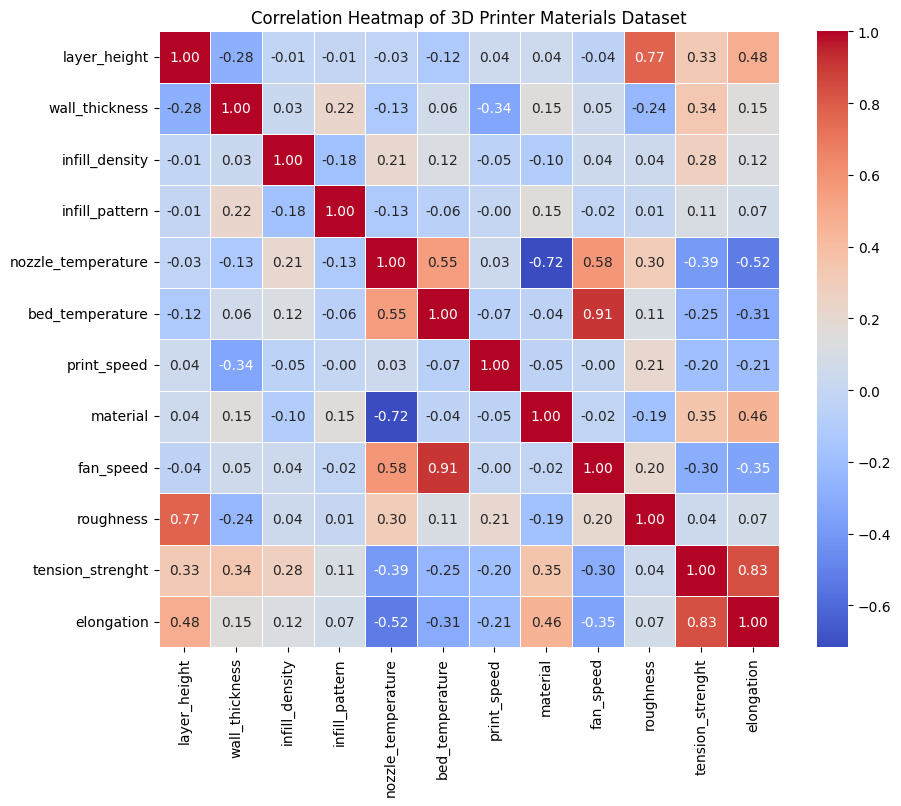

In [33]:
correlation_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of 3D Printer Materials Dataset')

# Show the plot
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [35]:
X_train.shape

(49, 11)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [37]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 64.71%


In [38]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import joblib
joblib.dump(clf, 'clf.joblib')

['clf.joblib']

In [44]:
pip install flask

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
app=flask(_)

NameError: name 'flask' is not defined

In [1]:
import numpy as np
print(np.__version__)

2.2.3


In [4]:
import joblib as pd
print(pd.__version__)

1.4.2
